In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

df = pd.read_csv("EPL.csv")

In [24]:
df.fillna(df.mean(numeric_only=True), inplace=True)

df["TotalGoals"] = df["FullTimeHomeTeamGoals"] + df["FullTimeAwayTeamGoals"]
df["GoalDifference"] = df["FullTimeHomeTeamGoals"] - df["FullTimeAwayTeamGoals"]
df["WinRate"] = df["HomeTeamPoints"] / (df["HomeTeamPoints"] + df["AwayTeamPoints"])

features = df[["TotalGoals", "GoalDifference", "WinRate"]]

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

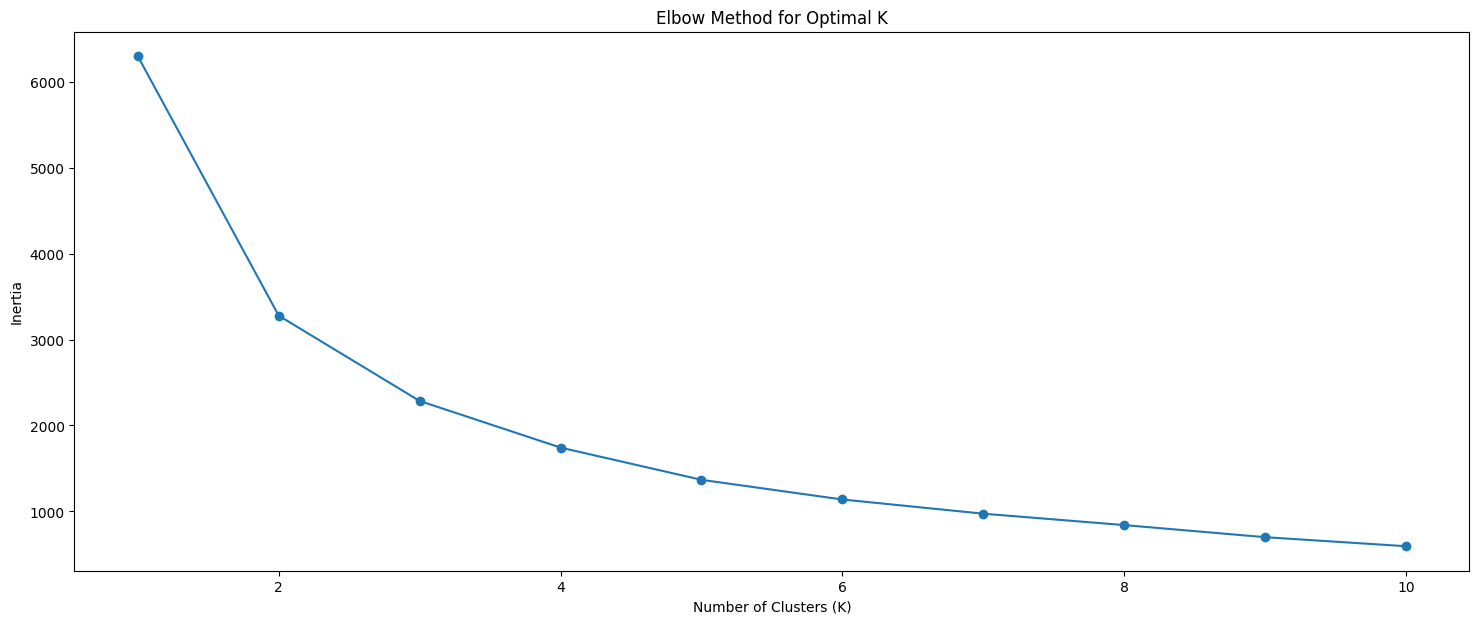

In [27]:
plt.figure(figsize=(18, 7))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [28]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

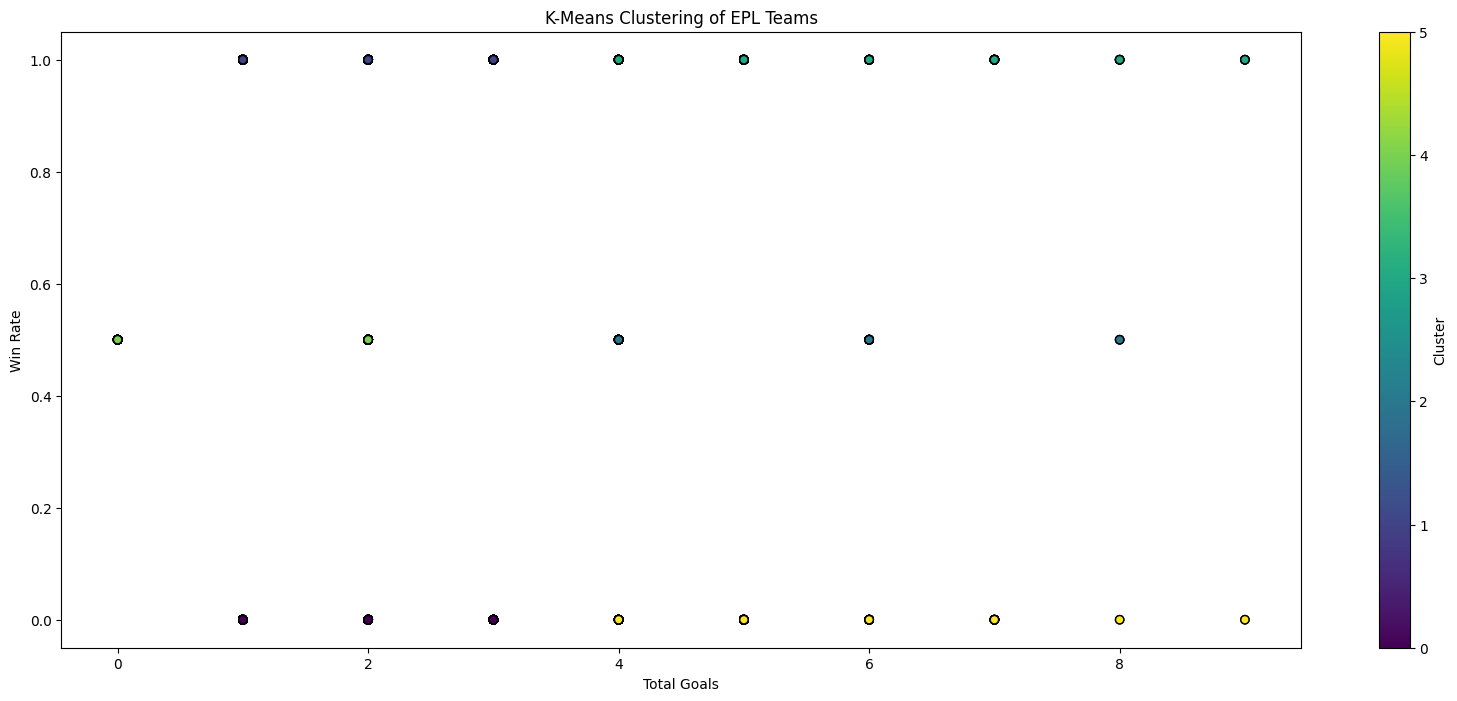

In [29]:
plt.figure(figsize=(20, 8))
plt.scatter(df["TotalGoals"], df["WinRate"], c=df["Cluster"], cmap="viridis", edgecolors='k')
plt.xlabel("Total Goals")
plt.ylabel("Win Rate")
plt.title("K-Means Clustering of EPL Teams")
plt.colorbar(label="Cluster")
plt.show()

In [30]:
print(tabulate(df[["HomeTeam", "TotalGoals", "GoalDifference", "WinRate", "Cluster"]].head(10), headers="keys", tablefmt="github", showindex=False))

| HomeTeam       |   TotalGoals |   GoalDifference |   WinRate |   Cluster |
|----------------|--------------|------------------|-----------|-----------|
| Liverpool      |            5 |                3 |       1   |         3 |
| West Ham       |            5 |               -5 |       0   |         5 |
| Bournemouth    |            2 |                0 |       0.5 |         4 |
| Burnley        |            3 |                3 |       1   |         1 |
| Crystal Palace |            0 |                0 |       0.5 |         4 |
| Watford        |            3 |               -3 |       0   |         0 |
| Tottenham      |            4 |                2 |       1   |         1 |
| Leicester      |            0 |                0 |       0.5 |         4 |
| Newcastle      |            1 |               -1 |       0   |         0 |
| Man United     |            4 |                4 |       1   |         3 |
